In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tips (data for regression problem).csv')

In [ ]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**UNIVARIATE ANALYSIS**

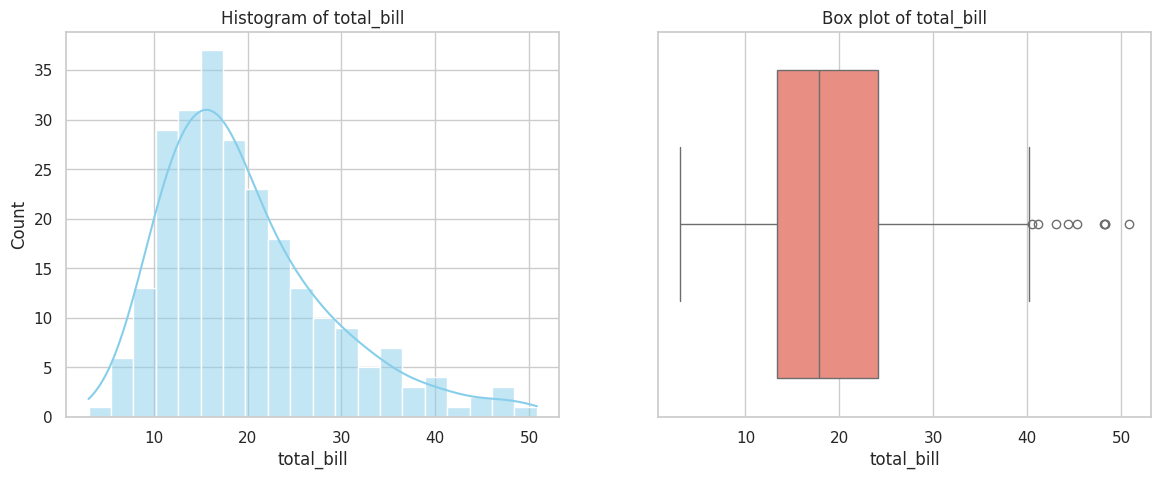

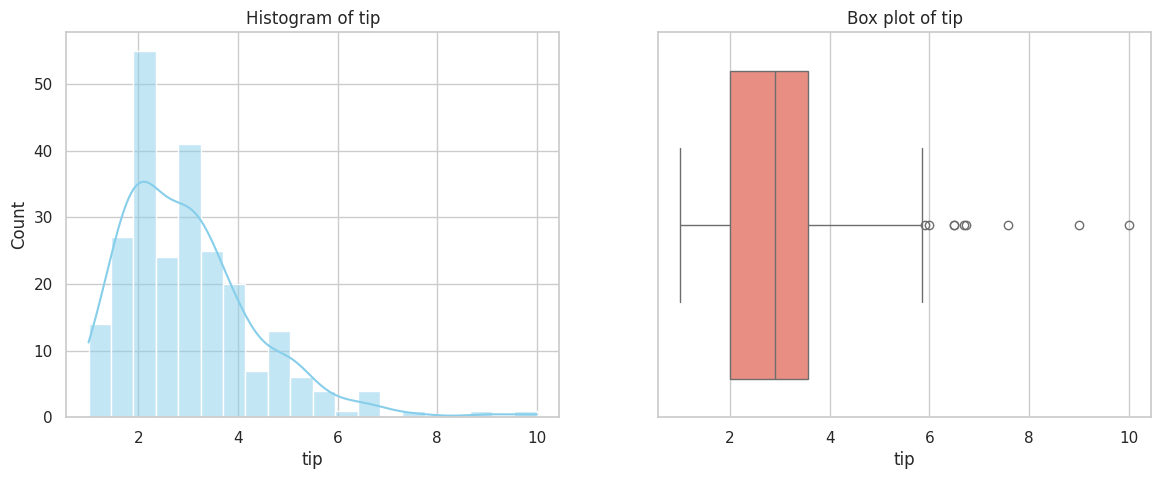

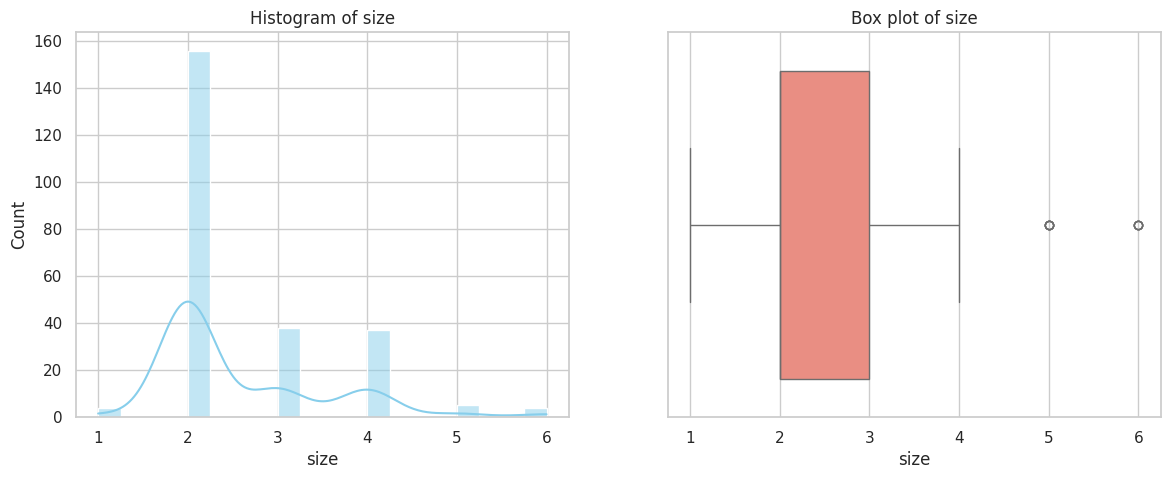

<ipython-input-14-1c7b03c72463>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette="viridis")


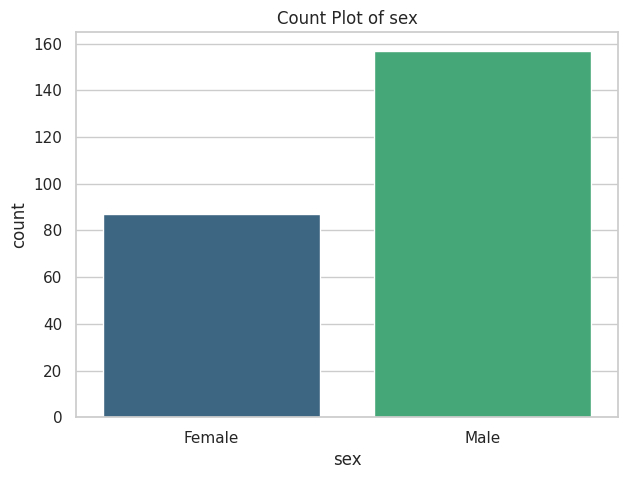

<ipython-input-14-1c7b03c72463>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette="viridis")


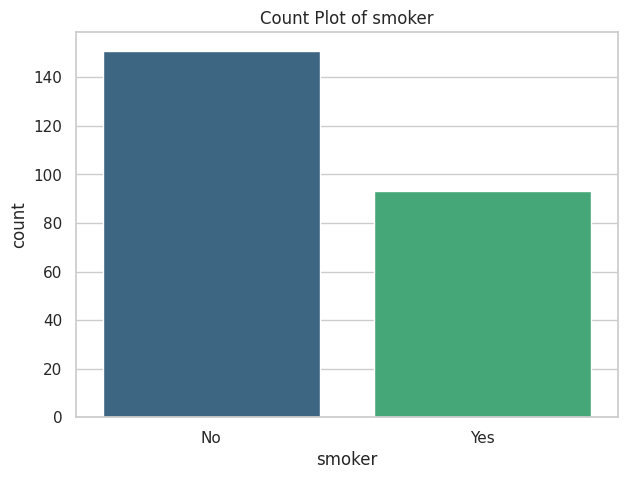

<ipython-input-14-1c7b03c72463>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette="viridis")


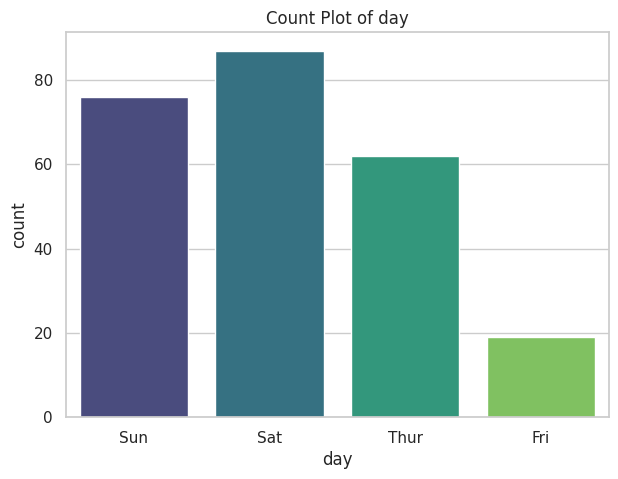

<ipython-input-14-1c7b03c72463>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette="viridis")


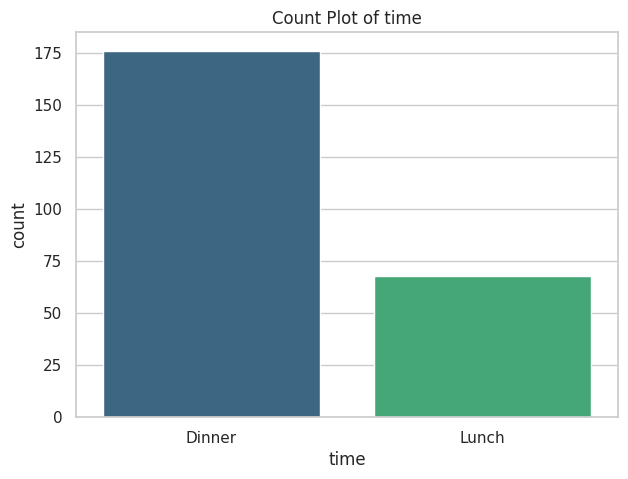

In [ ]:
# Set Seaborn style for plots
sns.set(style="whitegrid")

# Univariate Analysis of Numerical Features
numerical_features = ["total_bill", "tip", "size"]

# Histograms and Box Plots for Numerical Variables
for feature in numerical_features:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, color="skyblue", bins=20)
    plt.title(f'Histogram of {feature}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature], color="salmon")
    plt.title(f'Box plot of {feature}')

    plt.show()

# Univariate Analysis of Categorical Features
categorical_features = ["sex", "smoker", "day", "time"]

# Count Plots for Categorical Variables
for feature in categorical_features:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=data[feature], palette="viridis")
    plt.title(f'Count Plot of {feature}')
    plt.show()


Conclusion from the univariate analysis are:


1.   Both total_bill and tip are right-skewed, meaning most values are on the lower end, with occasional higher values (outliers).
2.   The presence of outliers in both features suggests that these rare high values may need to be addressed, depending on the modeling technique (e.g., scaling, transformation).
3.   Alternatively, transformations (e.g., log transformation) can help reduce skewness for linear models.

**BIVARIATE** **ANALYSIS**

In [31]:
# Encode categorical columns with Label Encoding for consistency in analysis
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ["sex", "smoker", "day", "time"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


SCATTER PLOT

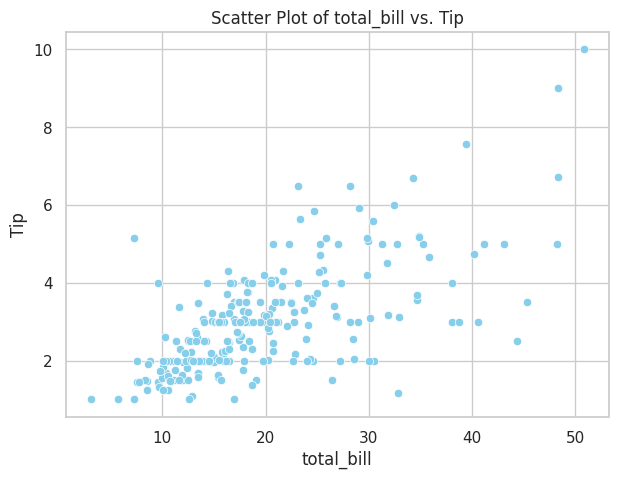

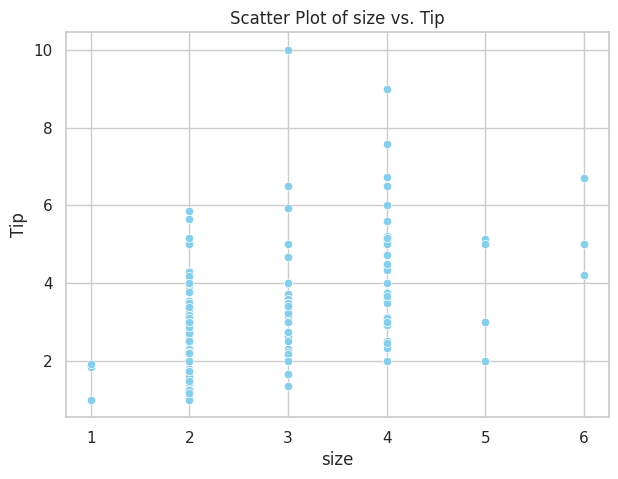

In [37]:
# Scatter Plots for Numerical Features Against `tip`
numerical_features = ["total_bill", "size"]

for feature in numerical_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=data[feature], y=data["tip"], color="skyblue")
    plt.title(f'Scatter Plot of {feature} vs. Tip')
    plt.xlabel(feature)
    plt.ylabel("Tip")
    plt.show()

It shows a certain level of linearity.
We'll test it further with rainbow plot

CORRELATION MATRIX OF FEATURES

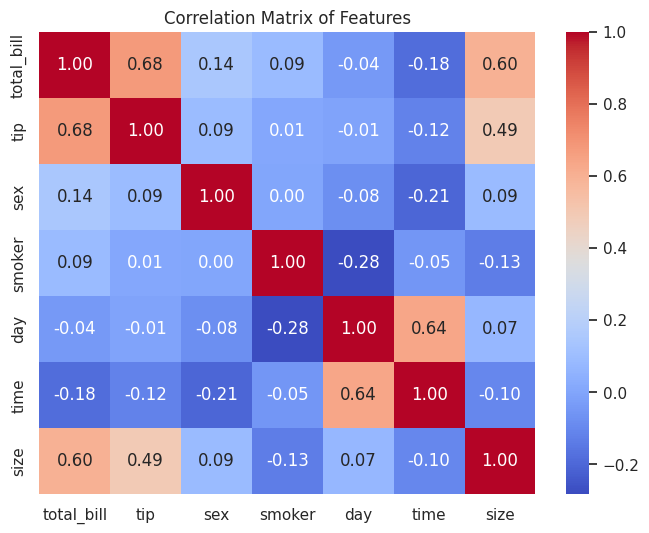

In [36]:
# Correlation Heatmap (using only numerical columns)
plt.figure(figsize=(8, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

BOX PLOTS

<ipython-input-35-60ae8ccdde9a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data["tip"], palette="viridis")


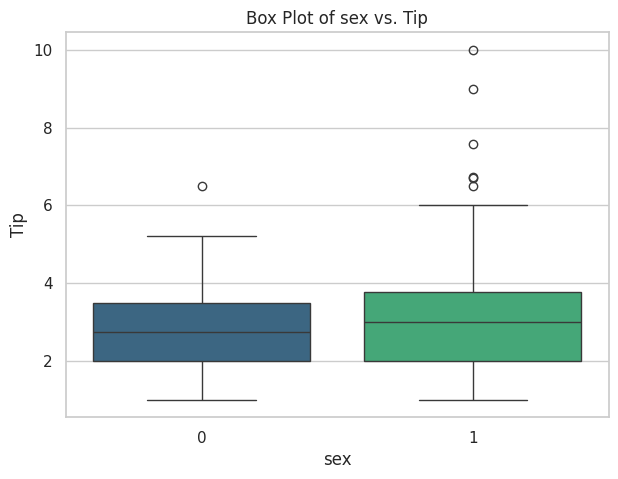

<ipython-input-35-60ae8ccdde9a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data["tip"], palette="viridis")


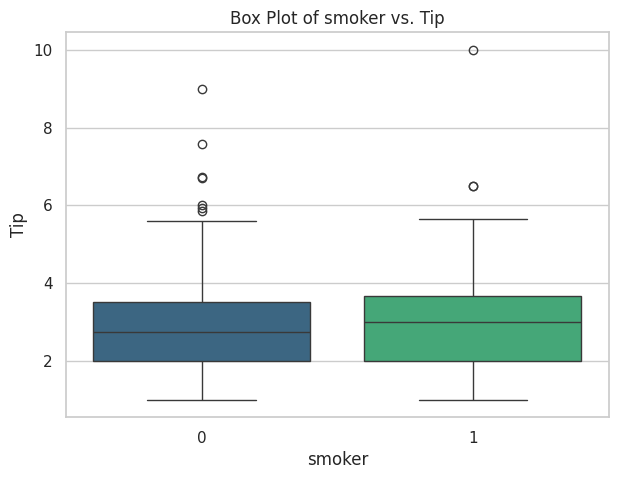

<ipython-input-35-60ae8ccdde9a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data["tip"], palette="viridis")


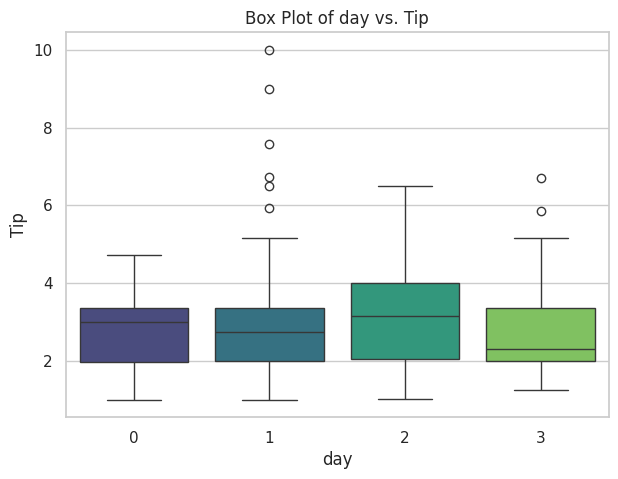

<ipython-input-35-60ae8ccdde9a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data["tip"], palette="viridis")


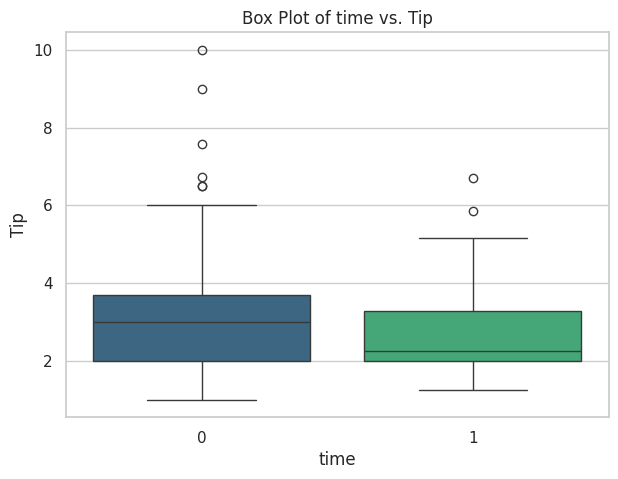

In [35]:
# Box Plots for Categorical Features Against `tip`
categorical_features = ["sex", "smoker", "day", "time"]

for feature in categorical_features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=data[feature], y=data["tip"], palette="viridis")
    plt.title(f'Box Plot of {feature} vs. Tip')
    plt.xlabel(feature)
    plt.ylabel("Tip")
    plt.show()

PAIR PLOT OF MULTIPLE FEATURES

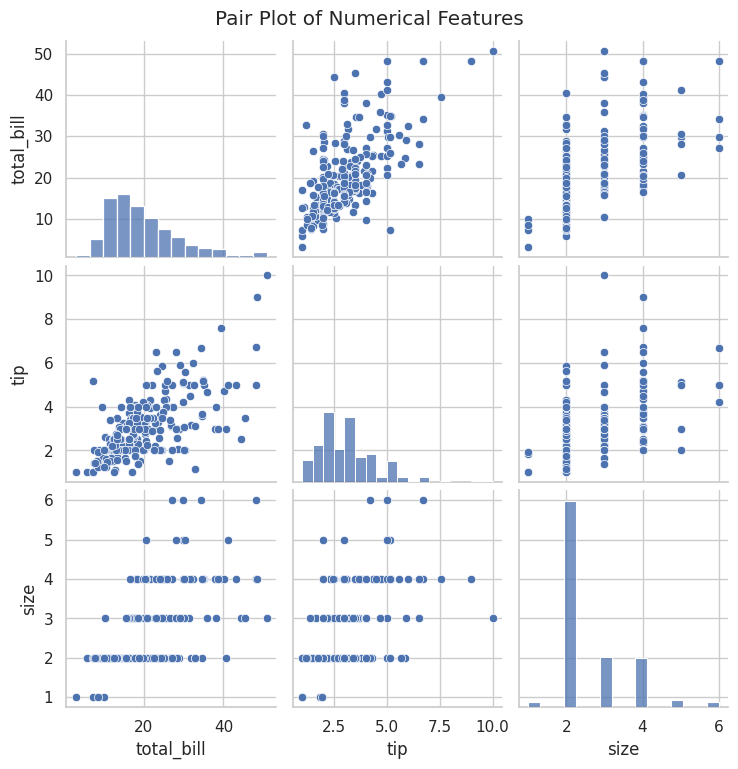

In [19]:
sns.pairplot(data[["total_bill", "tip", "size"]])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

STATISTICAL TESTS FOR LINEARITY (RAINBOW TEST)

In [22]:
from statsmodels.stats.diagnostic import linear_rainbow

# Define features and target
X = data.drop(columns="tip")
y = data["tip"]

# Add a constant to the model for intercept
X = sm.add_constant(X)

# Fit an OLS (Ordinary Least Squares) model for the Rainbow test
model = sm.OLS(y, X).fit()

# Perform the Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat:.4f}, p-value: {rainbow_p_value:.4f}")

if rainbow_p_value > 0.05:
    print("The Rainbow test suggests linearity in the data (p > 0.05).")
else:
    print("The Rainbow test suggests non-linearity in the data (p <= 0.05).")


Rainbow Test Statistic: 1.2036, p-value: 0.1580
The Rainbow test suggests linearity in the data (p > 0.05).


The results of the Rainbow test indicate that we do not have strong evidence against the assumption of linearity in the data (p-value = 0.1580, which is greater than 0.05). This suggests that a linear regression model might be suitable for predicting tips based on the features provided.

RESIDUALS PLOT

In [25]:
# Define features and target
X = data.drop(columns="tip")
y = data["tip"]

# One-hot encode categorical variables and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["total_bill", "size"]),
        ("cat", OneHotEncoder(drop="first"), ["sex", "smoker", "day", "time"])
    ]
)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# Fit and evaluate each model
for model_name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    # Train model
    pipeline.fit(X_train, y_train)
    # Make predictions
    y_pred = pipeline.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store results
    results[model_name] = {"MSE": mse, "R^2": r2}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R^2", ascending=False)

,MSE,R^2
Ridge Regression,0.700651,0.439466
Linear Regression,0.703357,0.437302
Support Vector Regression,0.709525,0.432367
K-Nearest Neighbors,0.814505,0.348381
Random Forest,0.902216,0.278210
Decision Tree,1.223502,0.021176
Lasso Regression,1.448668,-0.158961


Since Ridge Regression performed best, I’ll examine its coefficients to identify significant factors affecting tip amounts.
Ridge is often preferable when we believe all features might contribute to the prediction, which aligns with this dataset where most features showed some effect on tip amount.

In [26]:
# Extract coefficients from the best-performing Ridge Regression model
ridge_model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", Ridge())])
ridge_model.fit(X_train, y_train)

# Get feature names after preprocessing
feature_names = preprocessor.transformers_[0][2] + list(preprocessor.named_transformers_["cat"].get_feature_names_out())
coefficients = ridge_model.named_steps["regressor"].coef_

# Combine feature names with their corresponding coefficients in a DataFrame
ridge_coefficients = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

ridge_coefficients

,Feature,Coefficient
0,total_bill,0.821241
1,size,0.221387
3,smoker_1,-0.182036
4,day_1,-0.167018
6,day_3,-0.140373
7,time_1,0.073767
5,day_2,-0.032156
2,sex_1,0.028315


The coefficients from the Ridge Regression model indicate the impact of each feature on the tip amount:

Total Bill has the largest positive coefficient (0.82), suggesting it is the most influential factor on tip amount.
Party Size also has a positive impact (0.22).
Being a smoker slightly decreases the tip amount (-0.18).
Day of the week (particularly Saturday and Thursday) and time of meal (Lunch) have smaller but noticeable effects.
These findings suggest that larger bills and party sizes lead to higher tips, while other factors (such as being a smoker and the day of the week) also play minor roles.

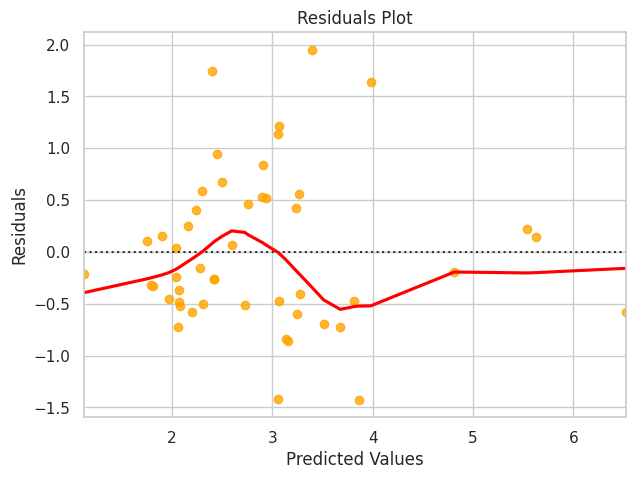

In [29]:
X = data[["total_bill", "size"]]
y = data["tip"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(7, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="orange", line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [30]:
# Evaluate model prediction accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.6483857677877597
R-squared (R2) Score: 0.48127949473413634
